### Classical addition using 3 Qubits. 

#### The problem:

Build a quantum circuit which will calculate the sum of 3 classical bits eg. 1 + 0 + 1 or 
1 + 1 + 1.

#### Circuit design.

To create an algorithm that makes use of quantum logic gates, all the possible input states
need to be considered. The maximum sum possible is 1 + 1 + 1 which is 2^0 + 2^0 + 2^0 = 3.
This can most easily be broken into 2^1 + 2^0 = 11 in binary. Another abritary example is 1 + 1 + 0 which is equivalent in decimal to 2^0 + 2^0 + 0 = 2. Again, equivalent to 2^1 + 0 = 10 in binary.

The conditions that need to be satisfied are:

    - If there is a |100> or state with only one qubit in |1> state output 01.
    - If there is a |110> or state with two qubits in |1> state output 10.
    - If there is a |111> state output 11.

Firstly, concentrating on the first output qubit, it should only be flipped to |1> when only one |1> state is present in the inputs or all 3 inputs are |1>. This can be achieved using a series of CNOTs connected to an output qubit, which cancel eachother out when 2 |1> states are present. 

Then, to calculate the second output qubit a series of connected Toffoli or CCNOT gates can be used to achieve a |1> state only when at least two |1> states are present in the inputs as with only 1 |1> state none of these such gates' condition will be satisfied. 

Finally, the circuit is measured, mapping qubits 3 and 4 onto classical bits 0 and 1, which represent the outcome of the addition, successfully calculating the sum of 3 bits using quantum logic gates. 

In [31]:
# IBM Quantum Lab boilerplate code.

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# result = Sampler("ibmq_qasm_simulator").run(circuits).result()

In [27]:
# Initliaze qunatum circuit with 5 qubits and 2 classical bits.
circuit = QuantumCircuit(5, 2)

# Add NOT gates two test different conditions.
# circuit.x(0)
# circuit.x(1)
circuit.x(2)

# Add CNOT gates to calculate first bit
circuit.cx(0, 3)
circuit.cx(1, 3)
circuit.cx(2, 3)

# Add Toffoli gares to calculate second bit
circuit.ccx(0, 1, 4)
circuit.ccx(0, 2, 4)
circuit.ccx(1, 2, 4)

In [28]:
# Measure qbits 3 and 4 onto classical bits 0 and 1.
circuit.measure([3, 4], [0, 1])

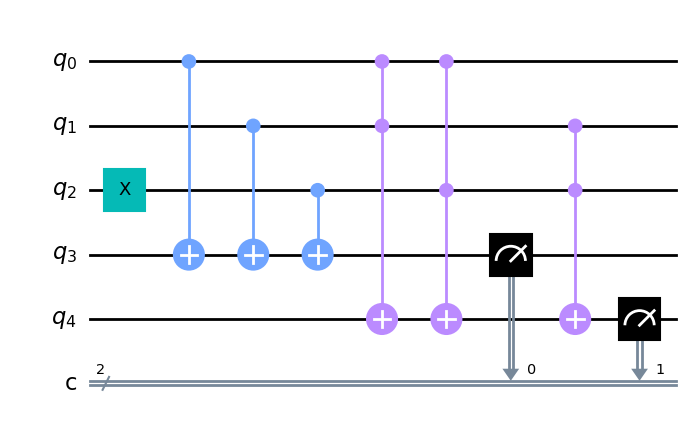

In [29]:
# Draw circuit
circuit.draw('mpl')

In [30]:
# Execute circuit on Aer simulator
simulator = Aer.get_backend('qasm_simulator')

# Excecute job
job = execute(circuit, simulator, shots=1024)

# Get results
results = job.result()
counts = results.get_counts(circuit)

# Print results. As this is in reality not a quantum operation no probabilities or 'counts' 
# required as the circuit should only output the correct answer due to the fact no
# qubits are in superposition within the circuit. 
sums = []

for key in counts.keys():
    sums.append(key)

# Print results
print(f'Results: {sums}')

Results: ['01']
